# IMD1107 - Processamento de Linguagem Natural 
## Atividade avaliativa da unidade 1
#### Grupo: Breno Ferreira, Daniel Luan, Fernando Gomes, Gabriel Bessa, Renato Palmiery

### Instruções da atividade

 O caderno precisa conter:
- **a) Análise exploratória de dados**
- **b) Storytelling**
- **c) Explicação detalhada de cada etapa**


### PLN e o Ramo do Varejo

A utilização de técnicas de processamento de linguagem natural e a análise exploratória de dados no ramo do varejo pode fornecer informações úteis para as empresas de modo a agilizar os processos de tomada de decisão, aumentar a produtividade dos funcionários, reduzir custos, aprimorar o processo de entrega dos produtos, identificar produtos, marcas ou parceiros que não tenham os requisitos de qualidade compatíveis com os valores da empresa, tudo isso com o intuito de melhorar a comunicação e a experiência de cada cliente. 

Outro ponto importante a ser destacado é o fato de que a utilização dessas ferramentas permite identificar percepções sobre o comportamento dos cliente, que são fundamentais para alavancar os negócios da empresa, pois contibui na hora da tomada de decisões, na criação de produtos mais interessantes e criação de condições de adaptação diante de mudanças nos padrões de consumo. 

(fonte: https://rockcontent.com/br/blog/o-que-e-nlp/)
(https://www.bornlogic.com/blog/inteligencia-artificial-no-varejo#:~:text=A%20intelig%C3%AAncia%20artificial%20no%20varejo,consumidor%20e%20impulsionar%20suas%20vendas.)

### B2W

A B2W foi uma empresa especializada em comércio eletrônico fundada em 2006. A empresa nasceu quando a loja virtual Submarino se uniu à Americanas.com e unificou a operação digital de ambos. Em 2021, no entanto, a B2W deixou de existir. A empresa se fundiu com as Lojas Americanas S.A. e deu origem a um único conglomerado, chamado Americanas S.A., que controla tanto as lojas físicas do grupo quanto as marcas de comércio eletrônico.  (fonte: https://canaltech.com.br/empresa/b2w/)

### Conjunto da Dados que será Analisado

O conjunto de dados escolhido foi o B2W-REVIEW01 (https://huggingface.co/datasets/ruanchaves/b2w-reviews01), que contém mais de 130 mil avaliações de clientes, coletados do site Americanas.com entre janeiro e maio de 2018. A escolha por esse conjunto de dados foi feita porque ele oferece informações valiosas sobre o perfil dos clientes, tais como, gênero, idade e localização geográfica, bem como possui dados bem estruturados com relação à avaliação feita pelo cliente sobre o produto, e também sobre qual o tipo de produto avaliado. 

Entendemos que a riqueza de informações desse conjunto de dados contribuirá para o aprendizado do grupo, que em sua maioria não havia tido contato com o conteúdo da disciplina anteriormente, de modo que possamos evoluir nas análises à medida em que novos assuntos forem ensinados ao longo da disciplina. Além disso, alguns integrantes do grupo trabalham no ramo do varejo/vendas, então a escolha por dados desssa área também teve este motivador.

 Os seguintes campos estão disponíveis no conjunto de dados escolhido:
 
1. **Data de submissão da avaliação:** submission_date
2. **Identificador único do cliente:** reviewer_id
3. **Identificador único do produto:** product_id
4. **Nome do produto:** product_name
5. **Marca do produto:** product_brand
6. **Categoria nível 1 do produto:** site_category_lv1
7. **Categoria nível 2 do produto:** site_category_lv1
8. **Título da avaliação:** review_title
9. **Nota geral do produto em uma escala de 1 a 5:** overall_rating
10. **Indicação de recomendação para um amigo (sim ou não):** recommend_to_a_friend
11. **Texto da avaliação:** review_text
12. **Ano de nascimento do cliente:** reviewer_birth_year
13. **Gênero do cliente:** reviewer_gender
14. **Localização do cliente (estado):** reviewer_state


# Importando Conjunto de Dados

In [8]:
# Importando o conjunto de dados do Huggingface

from datasets import load_dataset

df_b2w = load_dataset("ruanchaves/b2w-reviews01")

Found cached dataset b2w-reviews01 (C:/Users/GBFFO/.cache/huggingface/datasets/ruanchaves___b2w-reviews01/default/1.0.0/414dce7ecb4a1d15781c59f850c2abb5f36dca77358f366349c56501c50ba38d)


  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Exibindo a formatação original do dataset
df_b2w['train']

Dataset({
    features: ['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state'],
    num_rows: 132373
})

In [11]:
import pandas as pd # Importando a biblioteca do pandas (biblioteca para Ciências de Dados de código aberto)

df = pd.DataFrame(df_b2w['train']) # Convertendo o dataset para a estrutura de dados do Pandas

df # Exibindo o dataframe

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,None,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,None,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,None,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


# Análise Exploratória de Dados

### Importando bibliotecas interessantes para a Análise Exploratória dos Dados

In [12]:
# Importando a biblioteca NumPy: biblioteca para a linguagem de programação Python, que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes.)
import numpy as np 

# Importando a biblioteca matplotlib que serve para visualização de dados
import matplotlib.pylab as plt 

# Importando a biblioteca seaborn que é útil para geração de gráficos para análise exploratória de dados
import seaborn as sns 

plt.style.use('ggplot') # Configurando o "estilo" dos gráficos do Matplotlib

### Dados gerais do dataset e criação de novas colunas

In [13]:
# Exibindo as dimensões do nosso dataset: 132373 linhas e 14 colunas
df.shape

# Exibindo as colunas e o tipo de dado de cada coluna
df.dtypes

submission_date           object
reviewer_id               object
product_id                object
product_name              object
product_brand             object
site_category_lv1         object
site_category_lv2         object
review_title              object
overall_rating             int64
recommend_to_a_friend     object
review_text               object
reviewer_birth_year      float64
reviewer_gender           object
reviewer_state            object
dtype: object

In [14]:
# Verificando se existem dados duplicados no dataset, e caso exista, somente a primeira linha do registro duplicado é mantida no conjunto de dados

df = df.drop_duplicates().copy()

# Foram identicados 955 registros duplicados e excluídos do dataset (permaneceram 131418 registros)
df.shape

(131418, 14)

Como o tipo do dado 'submission_date' é um objeto, optamos por converter o tipo do dado para data para podermos executar algumas operações com esta informação.

In [15]:
# Convertendo o objeto em tipo data
df['submission_date'] = pd.to_datetime(df['submission_date'])

In [10]:
# Aplicando o método do describe() do pandas que é utilizado para visualizar alguns detalhes estatísticos dos dados
df.describe()

,submission_date,overall_rating,reviewer_birth_year
count,131418,131418.000000,125484.000000
mean,2018-03-16 13:28:57.512060928,3.503576,1977.476810
min,2018-01-01 00:11:28,1.000000,59.000000
25%,2018-01-28 17:15:39.249999872,2.000000,1969.000000
50%,2018-03-21 16:23:03.500000,4.000000,1980.000000
75%,2018-04-23 14:49:48,5.000000,1987.000000
max,2018-05-31 23:50:33,5.000000,2018.000000
std,NaN,1.525150,21.948135


- Em relação à data de submissão, é possível verificar que as avaliações foram submetidas entre 01/01/2018 e 31/05/2018.
- Sobre a média da nota de avaliação atribuída pelos consumidores, observa-se que ela tem pontuação de 3,5 (em uma escala que vai de 1 até 5). Portanto, isto é um indício que os clientes costumam atribuir notas mais altas do que baixas.
- Em relação ao ano de nascimento do avaliador: 
    1. Observa-se que 5934 dados não possuem essa informação (diferença entre a quantidade total de registros e a quantidade de registros com ano de nascimento diferente de nulo)
    2. Tendo em vista que os dados foram coletados entre 2016 e 2018, e que o ano médio de nascimento dos avaliadores é 1977, em um primeiro momento é possível estimar que a maioria dos avaliadores tem cerca de 40 anos de idade.
    3. Nota-se também que existem dados que devem ser desprezados nessa amostra se formos avaliar mais detalhadamente a questão da idade dos avaliadores, tendo em vista que existem anos de nascimento impossíveis (como o valor mínimo que seria o ano 59, e o valor máximo que seria de um usuário que sequer teria 1 ano de idade).

Para que pudessémos visualizar de uma maneira abrangente a idade dos consumidores que avaliaram os produtos, optou-se criar uma nova coluna que seria calculada pela diferença entre o ano em que a avaliação foi postada e o ano de nascimento do avaliador.

Para isso, foi necessário realizar algumas operações com o dataframe, que serão exibidas a seguir:

In [16]:
# Criando uma nova coluna com a idade do avaliador no momento da avaliação
df["age_when_review"] = df['submission_date'].dt.year - df['reviewer_birth_year']

# Tratando idades inconsistentes e atribuindo valores vazios para esses dados
df.loc[df.age_when_review > 100, 'age_when_review'] = np.nan
df.loc[df.age_when_review < 10, 'age_when_review'] = np.nan

df.describe()

df[:4]

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,age_when_review
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ,60.0
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC,22.0
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP,34.0
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP,33.0


Outra informação que achamos que seria revelante ter em uma coluna do conjunto da dados seria a quantidade de caracteres do texto do review (antes de qualquer limpeza). Posteriormente, esta informação pode ser útil para descartar certas avaliações que não possuem uma quantidade mínima de caracteres no texto da avaliação. Para isso, executamos as seguintes operações:

In [17]:
# Criando uma nova coluna com a quantidade de caracteres digitados no review
df["number_caracteres"] = df['review_text'].str.len()

# Exibindo novamente o quadro geral com informações estatísticas das novas colunas criadas
df.describe()


,submission_date,overall_rating,reviewer_birth_year,age_when_review,number_caracteres
count,131418,131418.000000,125484.000000,125397.000000,128226.000000
mean,2018-03-16 13:28:57.512060928,3.503576,1977.476810,40.337576,136.041965
min,2018-01-01 00:11:28,1.000000,59.000000,10.000000,50.000000
25%,2018-01-28 17:15:39.249999872,2.000000,1969.000000,31.000000,68.000000
50%,2018-03-21 16:23:03.500000,4.000000,1980.000000,38.000000,95.000000
75%,2018-04-23 14:49:48,5.000000,1987.000000,49.000000,154.000000
max,2018-05-31 23:50:33,5.000000,2018.000000,100.000000,4548.000000
std,NaN,1.525150,21.948135,12.732224,124.723819


Além disso, optamos também por criar uma coluna para identificar a região do país na qual o avaliador reside. Isto pode nos ajudar a segregar dados por região e, por exemplo, identificar se futuramente certas regiões do país costumam sem mais propensas a terem reclamações sobre o frete do produto ou ao tempo de entrega. Fazendo uma correlação com os desafios que as empresas do varejo enfrentam, essa informação combinada com outros dados podem, eventualmente, indicar onde certa empresa poderia instalar um novo centro de distribuição pensando não apenas em melhorar a experiência dos clientes de determinada região, mas até mesmo melhorar a logística de distribuição e reduzir custos operacionais.  

As operações a seguir foram realizadas para com intuito de criar essa nova coluna:

In [54]:
# Criando uma nova coluna a região que o avaliador reside
df["reviewer_region"] = np.nan

# Correlacionando os estados com as regiões do país
df.loc[df.reviewer_state == 'AC', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'AP', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'AM', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'PA', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'RO', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'RR', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'TO', 'reviewer_region'] = 'NORTE'
df.loc[df.reviewer_state == 'AL', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'BA', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'CE', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'MA', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'PB', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'PE', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'PI', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'RN', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'SE', 'reviewer_region'] = 'NORDESTE'
df.loc[df.reviewer_state == 'DF', 'reviewer_region'] = 'CENTRO-OESTE'
df.loc[df.reviewer_state == 'GO', 'reviewer_region'] = 'CENTRO-OESTE'
df.loc[df.reviewer_state == 'MT', 'reviewer_region'] = 'CENTRO-OESTE'
df.loc[df.reviewer_state == 'MS', 'reviewer_region'] = 'CENTRO-OESTE'
df.loc[df.reviewer_state == 'ES', 'reviewer_region'] = 'SUDESTE'
df.loc[df.reviewer_state == 'MG', 'reviewer_region'] = 'SUDESTE'
df.loc[df.reviewer_state == 'RJ', 'reviewer_region'] = 'SUDESTE'
df.loc[df.reviewer_state == 'SP', 'reviewer_region'] = 'SUDESTE'
df.loc[df.reviewer_state == 'PR', 'reviewer_region'] = 'SUL'
df.loc[df.reviewer_state == 'RS', 'reviewer_region'] = 'SUL'
df.loc[df.reviewer_state == 'SC', 'reviewer_region'] = 'SUL'

# Contando a quantidade de avaliações por região do país
df['reviewer_region'].value_counts()



reviewer_region
SUDESTE         85592
SUL             17731
NORDESTE        14759
CENTRO-OESTE     6703
NORTE            2676
Name: count, dtype: int64

Diante do resultado obtido, é possível observar como a esmagadora maioria das avaliações realizadas foi feita na região sudeste do país (e quase 50 mil delas é do estado de São Paulo).

In [55]:
# Tratando dados vazios sobre o gênero e substituindo por NA
df['reviewer_gender'].fillna('NA', inplace=True)

df['reviewer_gender'].value_counts()

reviewer_gender
M     65643
F     61675
NA     4100
Name: count, dtype: int64

Observa-se que a quantidade de avaliações realizadas por homens e mulheres são próximas, e que 4100 registros não possuem essa informação. 

## Gerando Gráficos para Analisar o Dataset

### Quantidade de avaliações por região

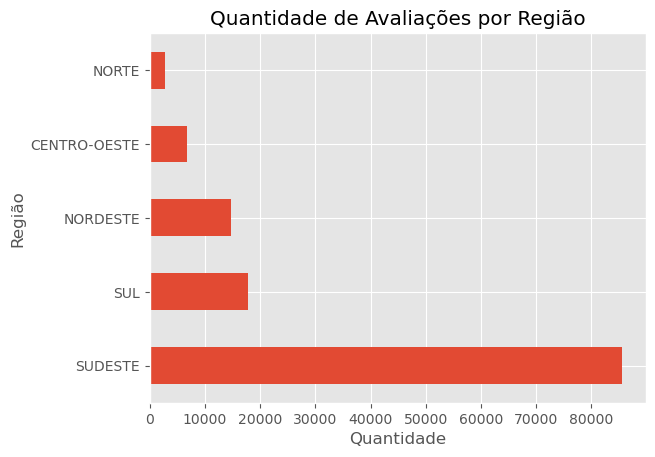

In [56]:
# Quantidade de reviews por região
ax_review_region = df['reviewer_region'].value_counts().plot(kind='barh', title='Quantidade de Avaliações por Região', xlabel='Quantidade',ylabel='Região')

- Os dados são desbalanceados em relação à quantidade de reviews por região
- A região sudeste detém a maioria dos comentários
- Quando estivermos testando nosso modelo, devemos atentar para coletar dados de todas as regiões, pois dessa forma poderemos capturar alguma particularidade que possa existir em certas regiões do país.

### Idade dos avaliadores

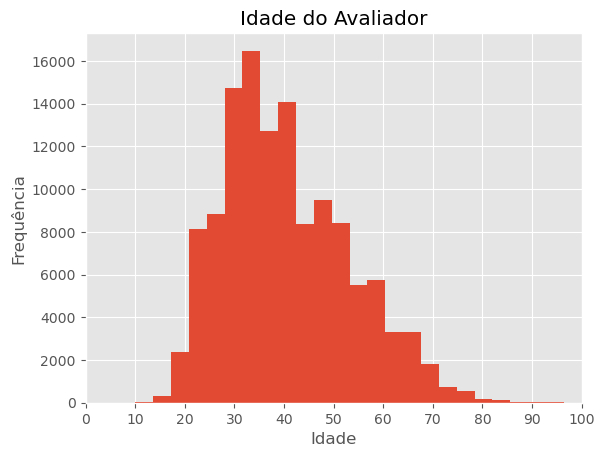

In [57]:
# Histograma: Idade do avaliador
ax_age_reviewer = df['age_when_review'].plot(kind='hist', title='Idade do Avaliador', bins =25, xlim=(0,100), xlabel='Idade',ylabel='Frequência', xticks=(0,10,20,30,40,50,60,70,80,90,100), grid=True)


- A maioria do avaliadores tinham cerca entre 30 e 45 anos de idade quando realizaram os reviews sobre os produtos

### Quantidade de caracteres escritos por review

<Axes: title={'center': 'Quantidade de caracteres por review'}, xlabel='Quantidade de caracteres (sem tratamento)', ylabel='Frequência'>

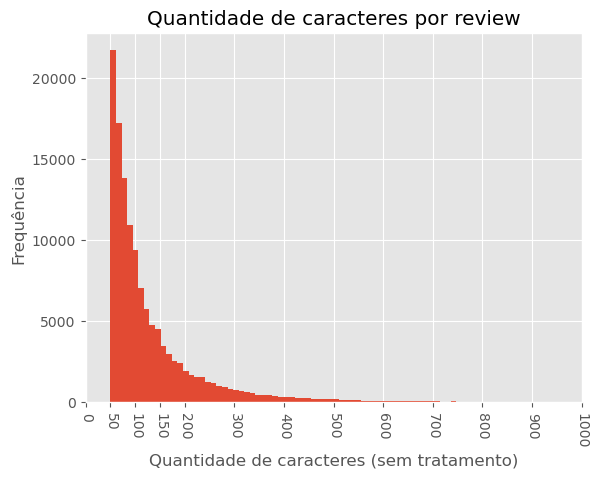

In [58]:
# Estimativa de densidade dos dados (KDE): Quantidade de caracteres por review
#df['number_caracteres'].plot(kind='kde', title='Quantidade de caracteres por review', grid=True, xlim=(0,1000),xticks=(0,50,100,200,300,400,500,600,700,800,900,1000),xlabel='Quantidade de caracteres',ylabel='Densidade')

# Histograma: Quantidade de caracteres por review
ax_number_caracteres = df['number_caracteres'].plot(kind='hist', title='Quantidade de caracteres por review', grid=True, xlim=(0,1000),xticks=(0,50,100,150,200,300,400,500,600,700,800,900,1000),xlabel='Quantidade de caracteres (sem tratamento)',ylabel='Frequência',bins =400)
ax_number_caracteres.set_xticklabels(ax_number_caracteres.get_xticks(), rotation = -90)
ax_number_caracteres
# https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb


- Observa-se que a quantidade mínima de caracteres que um review pode ter é 50 caracteres (*Obs: após a limpeza dos dados teremos que observar se isso não se deve a alguma estrutura da aplicação que sempre salva no banco espaços para completar os 50 caracteres, ou se os usuários não completam os comentários com '....' ou outros caracteres irrelevantes para a análise*)
- A maioria das avaliações tem entre 50 e 100 caracteres

### Analisando as notas atribuídas: quantidade total, comparação por gênero e por região

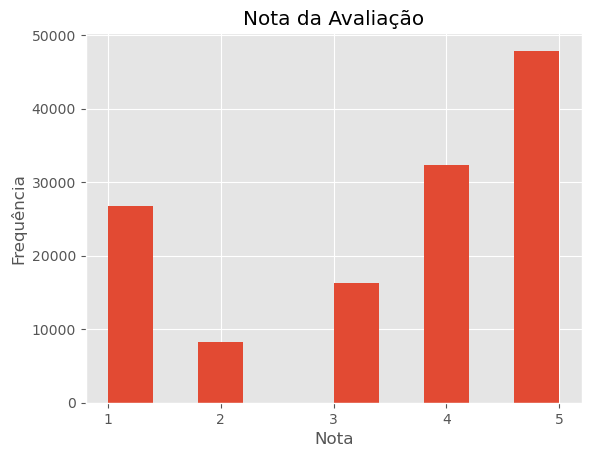

In [59]:
# Histograma: Nota atribuídas
ax_overall_rating = df['overall_rating'].plot(kind='hist', title='Nota da Avaliação', xlabel='Nota',ylabel='Frequência', xticks=(1,2,3,4,5), grid=True)

- A maioria das notas atribuídas foi a nota máxima (5)

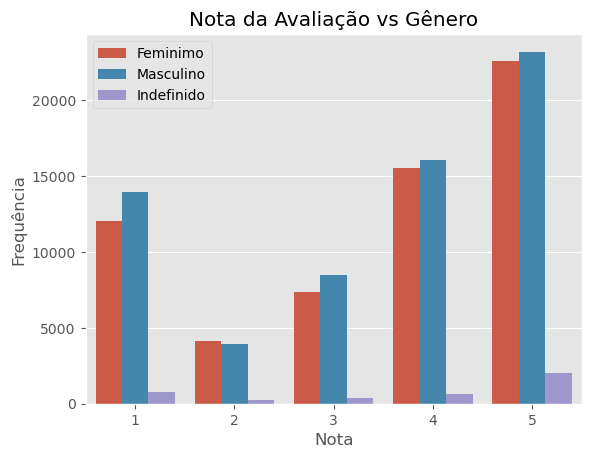

In [63]:
g3 = sns.countplot(x='overall_rating', hue='reviewer_gender', data=df)
legend_handles, _= g3.get_legend_handles_labels()
g3.legend(legend_handles, ['Feminimo','Masculino','Indefinido'])
plt.title('Nota da Avaliação vs Gênero')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

- Observa-se que as notas dos consumidores não tiveram variações discrepantes quando categorizamos elas por gênero, ou seja, o comportamento das notas serem mais altas ou baixas foi o "mesmo" para homens e mulheres.

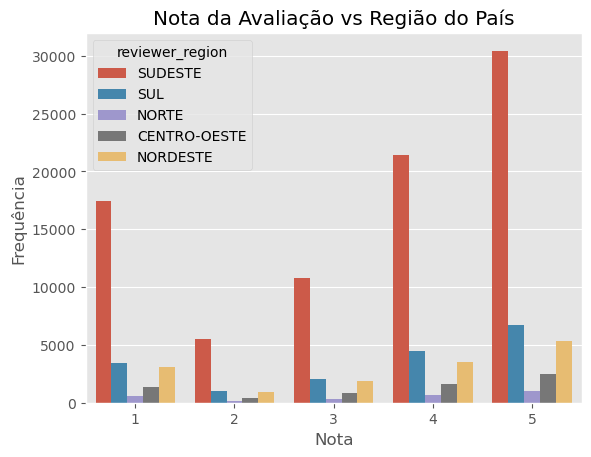

In [64]:
g4 = sns.countplot(x='overall_rating', hue='reviewer_region', data=df)
legend_handles, _= g4.get_legend_handles_labels()
plt.title('Nota da Avaliação vs Região do País')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

O gráfico acima ajuda a identificar as quantidade absolutas das notas atribuídas por região, e que naturalmente a região sudeste se destaca pelas maiores frequências em cada nota devido a quantidade de registros dessa região ser bem maior que as demais. Para que possamos analisar cada região de maneira mais clara, iremos agrupar esses dados por região e normalizar a frequência.

d:\Anaconda\envs\AmbientePLN\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


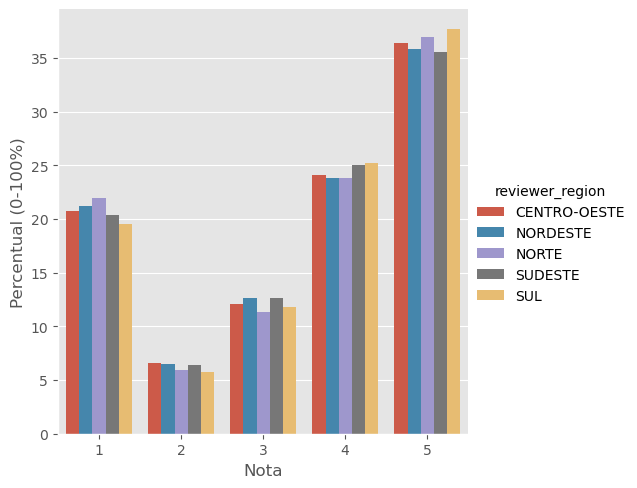

In [84]:
# Plotando o gráfico que informa a porcentagem de notas de 1 a 5 atribuídas por cada região (agrupando por região), com intuito de buscar identificar se certas regiões costumam atribuir notas mais altas que outras

x,y = 'overall_rating', 'reviewer_region'

(df.groupby(y)[x].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

plt.xlabel('Nota')
plt.ylabel('Percentual (0-100%)')
plt.show()

# https://stackoverflow.com/questions/34615854/countplot-with-normalized-y-axis-per-group

Analisando o gráfico acima, quando agrupamos as notas por região e normalizamos os valores por região, nota-se que proporcionalmente as notas atribuídas por cada região seguem uma mesma proporção, então por esse gráfico não há indicativos de que certas regiões do país costumem dar notas mais altas ou baixas que outras. 

### Nota da Avaliação e a Recomendação para um Amigo

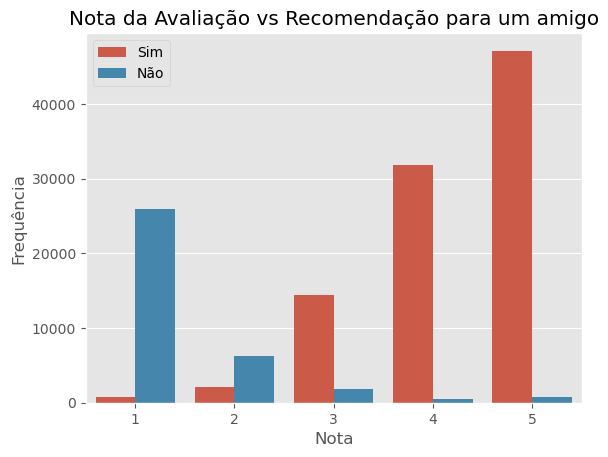

In [91]:
g6 = sns.countplot(x='overall_rating', hue='recommend_to_a_friend', data=df)
legend_handles, _= g6.get_legend_handles_labels()
g6.legend(legend_handles, ['Sim','Não'])
plt.title('Nota da Avaliação vs Recomendação para um amigo')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

Quando relacionamos as notas atribuídas com a indicação de recomendação do produto para um amigo, foi observado que as notas mais altas tiveram uma quantidade de registros assinalados como "não recomendo para um amigo" baixíssima, e vice-versa. Esse comportamento era esperado, mas poderemos futuramente avaliar a partir do texto do review o porquê de algumas notas mínimas os avaliadores terem informado que recomendariam para um amigo, ou de notas máximas o avaliador ter informado que não recomendaria.

### Idade dos Avaliadores e os Produtos Comprados

In [131]:
# Qual a idade média de idade dos compradores por categoria (categorias com pelo menos 20 compras)?
df.groupby('site_category_lv1')['age_when_review'].agg(['mean','count']).query('count >= 20').sort_values('mean',ascending=False)

,mean,count
site_category_lv1,,
Artesanato,47.619048,21
Telefonia Fixa,46.093822,437
Linha Industrial,46.036364,110
Sinalização e Segurança,45.877193,57
Ferramentas e Jardim,44.172023,1587
Casa e Construção,43.796075,4178
Pet Shop,43.303669,1281
Eletroportáteis,42.688444,11388
Utilidades Domésticas,42.678934,7880


- Ao compararmos a média de idade dos avaliadores com a categoria do produtos comprados, notamos que, em geral, o perfil dos usuários mais jovens tende a comprar mais produtos de bebê, jogos e eletrônicos (categorias: Game Bebês, Wearable, Celulares e Smartphones, Wearable), enquanto o perfil com mais idade costuma comprar produtos para a casa/empresa/indústria e artesanato (categoria: Artesanato, Telefonia Fixa, Linha industrial, Sinalização e Segurança, Casa e Construção, Ferramentas e Jardins).

### Relação entre as categorias de produtos comprados e o gênero dos compradores

Também foi realizada uma análise geral sobre quais categorias de itens são mais compradas por mulheres, e quais são mais procuradas pelos homens. A análise feita consistiu em calcular o percentual de compras por categoria em cada gênero separadamente (masculino ou feminino), e depois apresentar as categorias que mais que mais diferiram.

##### Categorias mais compradas por homens quando comparados com as mulheres
|        CATEGORIA        | MULHER | HOMEM | %MULHER -   %HOMEM |
|:-----------------------:|:------:|:-----:|:------------------:|
|  Beleza e   Perfumaria  |  9,48% | 4,39% |        5,09%       |
| Utilidades   Domésticas |  8,31% | 4,37% |        3,94%       |
|     Eletroportáteis     | 10,97% | 7,20% |        3,77%       |
|          Móveis         |  6,43% | 4,17% |        2,26%       |
|          Bebês          |  3,43% | 1,22% |        2,21%       |
|   Cama, Mesa e   Banho  |  3,21% | 1,14% |        2,07%       |
|        Brinquedos       |  4,60% | 2,66% |        1,94%       |
|          Livros         |  3,78% | 2,64% |        1,14%       |
|         Pet Shop        |  1,40% | 0,66% |        0,74%       |
|          Saúde          |  2,46% | 1,74% |        0,72%       |
|           Moda          |  2,15% | 1,65% |        0,50%       |
|        Decoração        |  1,26% | 0,87% |        0,39%       |
|     Eletrodomésticos    |  3,15% | 2,84% |        0,31%       |
|        Papelaria        |  1,03% | 0,75% |        0,28%       |
|   Malas e   Acessórios  |  0,59% | 0,52% |        0,07%       |
##### Categorias mais compradas por mulheres quando comparadas com os homens
|            CATEGORIA            | MULHER |  HOMEM | %HOMEM -   %MULHER |
|:-------------------------------:|:------:|:------:|:------------------:|
|   Informática   de Acessórios   |  3,33% |  7,86% |        4,53%       |
|            Automotivo           |  1,09% |  4,64% |        3,54%       |
|    Celulares e   Smartphones    | 14,09% | 17,36% |        3,28%       |
|       TV e Home   Theater       |  4,17% |  7,23% |        3,05%       |
|              Games              |  1,41% |  3,74% |        2,33%       |
|       Casa e   Construção       |  2,32% |  4,28% |        1,96%       |
|      Ferramentas e   Jardim     |  0,59% |  1,90% |        1,31%       |
|        Esporte e   Lazer        |  1,75% |  2,69% |        0,94%       |
|           Informática           |  2,69% |  3,59% |        0,90%       |
|      Câmeras e   Filmadoras     |  0,53% |  1,24% |        0,71%       |
|              Áudio              |  0,79% |  1,46% |        0,67%       |
|     Instrumentos   Musicais     |  0,42% |  0,93% |        0,51%       |
|        Filmes e   Séries        |  0,27% |  0,65% |        0,38%       |
| Ar-condicionado   e Aquecedores |  0,43% |  0,72% |        0,30%       |
|             Relógios            |  1,01% |  1,23% |        0,22%       |


Analisando o conjunto de dados coletado, nota-se que as categorias de produtos que as mulheres compraram percentualmente mais que os homens costumam ser as relacionadas aos produtos de beleza, produtos para o lar e produtos de bebê, enquanto os homens, quando comparados às mulheres, buscam mais produtos de informática, acessórios automotivos e smartphones. 


### Usando a funcionalidade da biblioteca Seaborn para comparar/correlacionar diversas características do nosso conjunto de dados (objetivo: identificar outros padrões entre os dados)

d:\Anaconda\envs\AmbientePLN\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


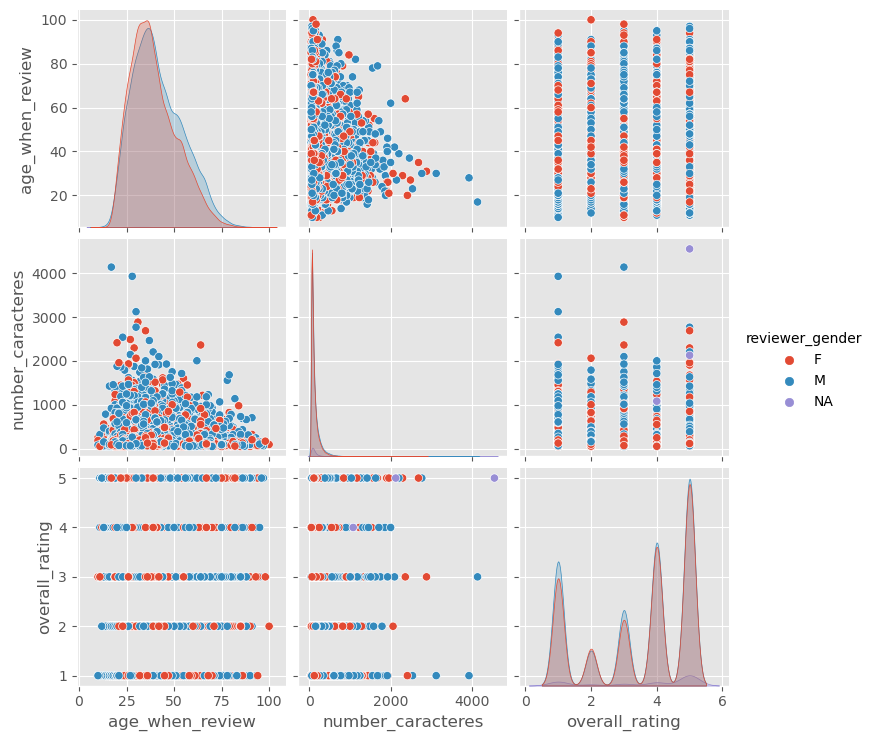

In [88]:
# Analisando alguns dados por gênero
sns.pairplot(df, vars=['age_when_review','number_caracteres','overall_rating'], hue='reviewer_gender')
plt.show()

d:\Anaconda\envs\AmbientePLN\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


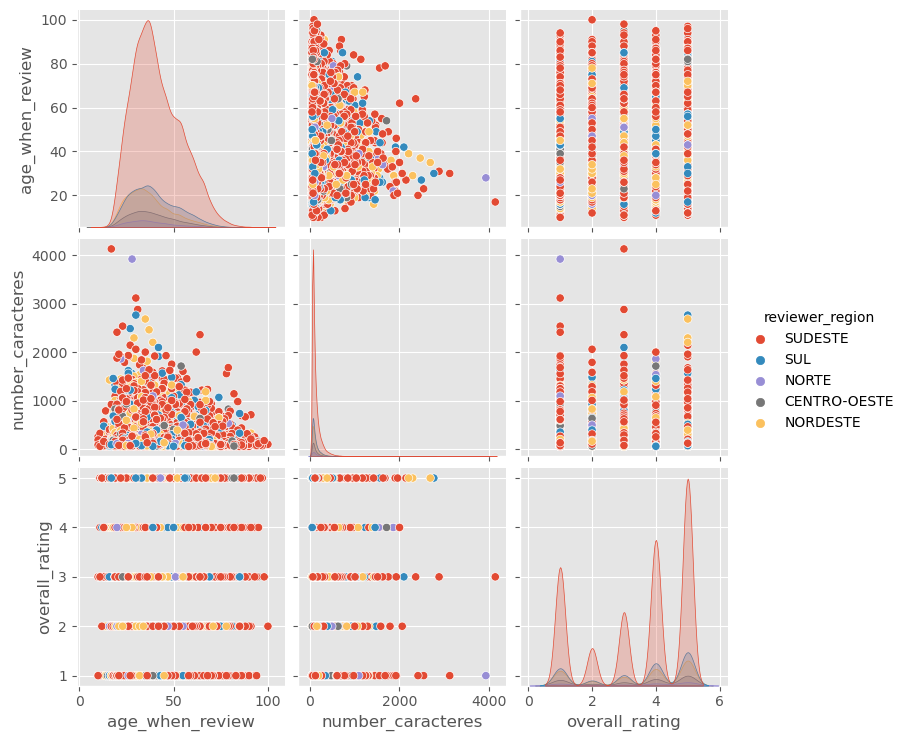

In [89]:
# Analisando alguns dados por região
sns.pairplot(df, vars=['age_when_review','number_caracteres','overall_rating'], hue='reviewer_region')
plt.show()

d:\Anaconda\envs\AmbientePLN\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


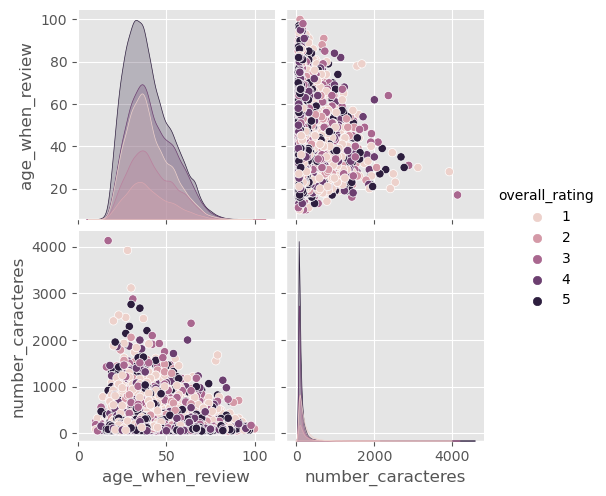

In [97]:
# Analisando alguns dados por nota
sns.pairplot(df, vars=['age_when_review','number_caracteres'], hue='overall_rating')
plt.show()

d:\Anaconda\envs\AmbientePLN\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


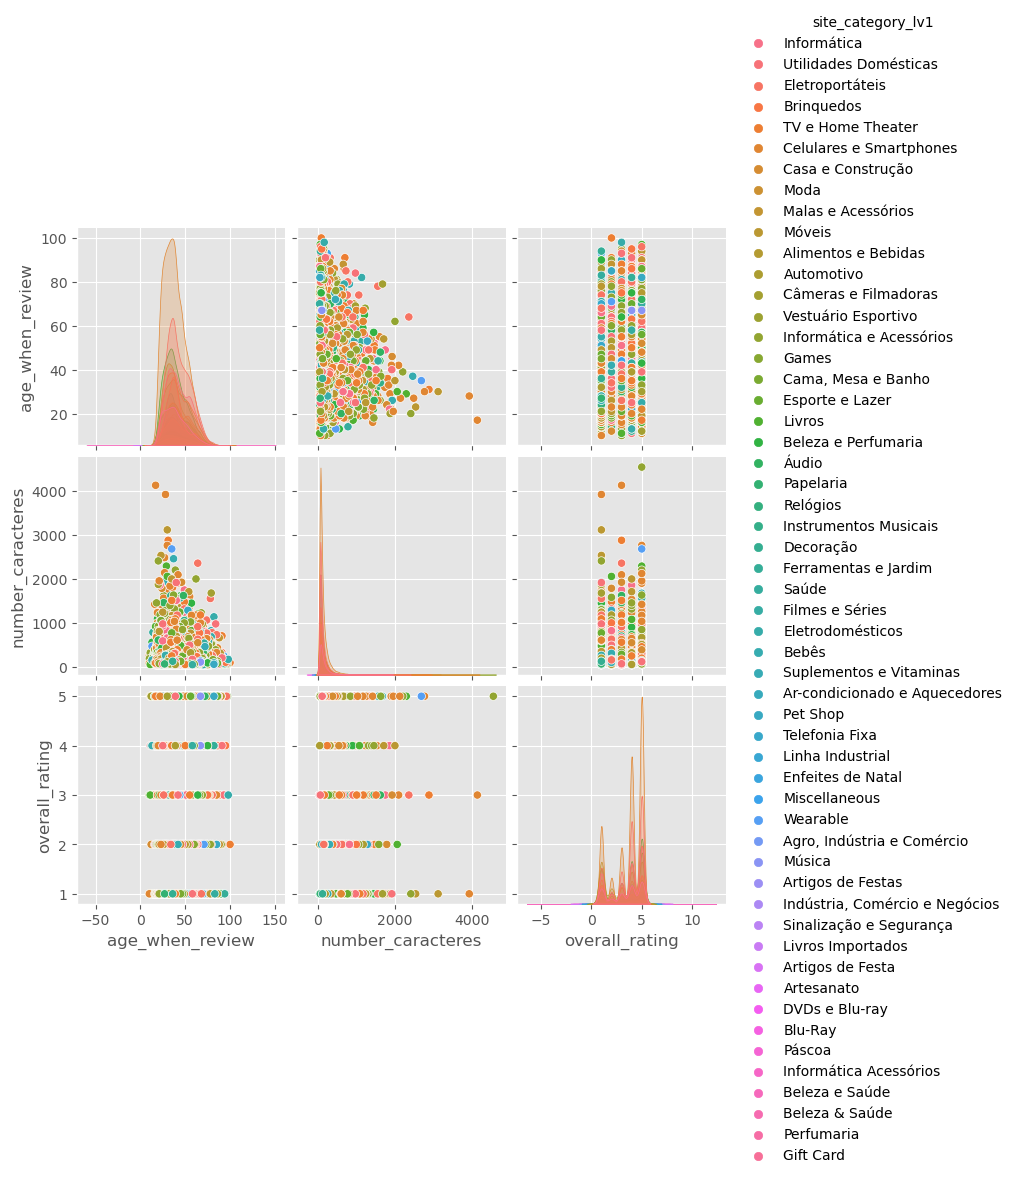

In [95]:
# Analisando alguns dados por categoria do produto
sns.pairplot(df, vars=['age_when_review','number_caracteres','overall_rating'], hue='site_category_lv1')
plt.show()

In [93]:

# # Relacionando a quantidade de caracteres escritos com a idade do avaliador e a nota atribuída
# g0 = sns.scatterplot( x='age_when_review', y= 'number_caracteres', hue='overall_rating', data=df)

# plt.xlabel('Idade do avaliador')
# plt.ylabel('Número de caracteres do review')
# plt.show()

In [108]:
# Outros gráficos para buscar identificar algum padrão ou comportamento
##df.plot(kind='scatter', x='overall_rating', y= 'age_when_review')

##df.plot(kind='scatter', x='overall_rating', y= 'number_caracteres')

##plt.show()

##sns.stripplot(x='reviewer_gender', y='age_when_review', data=df)
##sns.stripplot(x='reviewer_gender', y='age_when_review', data=df, hue='Type', split=True)
##sns.swarmplot(x='reviewer_gender', y='age_when_review', data=df)

# # Gráfico para avaliar as notas atribuídas por homens e mulheres
# g1 = sns.FacetGrid(df, col='reviewer_gender') #Cria um grid vazio
# g1.map(sns.countplot, 'overall_rating', alpha=0.8) #preenche com o gráfico
# g1.set_titles(col_template='{col_name}', row_template='Nota')



# #https://www.youtube.com/watch?v=-esRf38TqkI&t=289s

# g5 = sns.histplot(x = df['overall_rating'], hue=df['reviewer_region'], multiple="dodge", 
#                   stat = 'density', common_norm=False)


# df_corr = df[['age_when_review','number_caracteres','overall_rating']].dropna().corr()
# sns.heatmap(df_corr, annot=True)

In [132]:
# Quais são as categorias mais compradas por gênero (mínimo de 1000 compras por categoria)?

#df.groupby('site_category_lv1')['age_when_review'].agg(['mean','count']).query('count >= 20').sort_values('mean',ascending=False)

df.groupby('site_category_lv1')['age_when_review'].agg(['mean','count']).query('count >= 20').sort_values('mean',ascending=False)

TypeError: can only concatenate str (not "int") to str